Explore Dry Beans Classification using models which will help us to recognize the type of beans.
Reading the Data, Understanding the Data, Exploratory Data Analysis, Splitting the Data, 
Training and Testing, Modeling, Accuracy

In [1]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read the data
beans = pd.read_csv("Dry_Bean_Dataset.csv")
beans.head(3)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610291.00,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638018.00,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.11,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER


In [3]:
#Get the shape of the data
beans.shape

(13611, 17)

In [4]:
#Get the information of data frame
beans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [5]:
#Data Cleaning
#No Null values found
#Convert object to category
beans["Class"] = beans["Class"].astype("category")

In [6]:
#Description of dataset
beans.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,1.361100e+04,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,7.729110e+05,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,3.238848e+05,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,5.536000e+02,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,6.769955e+05,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,7.722730e+05,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,9.555000e+05,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1.921685e+06,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [7]:
#Column names to Check for duplication
column_names = ['Area','Perimeter','Class']
duplicates = beans.duplicated(subset = column_names, keep = False)
beans[duplicates]

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
5504,33518,702956.00,277.571399,154.305581,1.798842,0.831240,34023,206.582775,0.808383,0.985157,0.852377,0.744251,0.008281,0.001567,0.553909,0.996396,HOROZ
5505,33518,702956.00,277.571399,154.305581,1.798842,0.831240,34023,206.582775,0.808383,0.985157,0.852377,0.744251,0.008281,0.001567,0.553909,0.996396,HOROZ
5508,33954,716.75,277.368480,156.356326,1.773951,0.825970,34420,207.922042,0.799482,0.986461,0.830549,0.749624,0.008169,0.001591,0.561936,0.996847,HOROZ
5509,33954,716.75,277.368480,156.356326,1.773951,0.825970,34420,207.922042,0.799482,0.986461,0.830549,0.749624,0.008169,0.001591,0.561936,0.996847,HOROZ
5547,38427,756323.00,306.533886,160.591784,1.908777,0.851782,38773,221.193978,0.796976,0.991076,0.844174,0.721597,0.007977,0.001334,0.520702,0.993905,HOROZ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7285,63948,996497.00,412.297178,198.877557,2.073121,0.875971,64641,285.343867,0.777909,0.989279,0.809254,0.692083,0.006447,0.000912,0.478979,0.992981,HOROZ
7339,65766,1035842.00,406.416622,207.242369,1.961069,0.860218,66698,289.371512,0.792295,0.986027,0.770237,0.712007,0.006180,0.000980,0.506954,0.994172,HOROZ
7340,65766,1035842.00,406.416622,207.242369,1.961069,0.860218,66698,289.371512,0.792295,0.986027,0.770237,0.712007,0.006180,0.000980,0.506954,0.994172,HOROZ
7341,65781,1039257.00,409.713859,204.992832,1.998674,0.865834,66762,289.404510,0.642549,0.985306,0.765358,0.706358,0.006228,0.000956,0.498941,0.997221,HOROZ


In [8]:
#Sort the duplicates
beans[duplicates].sort_values(by="Area")

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
5504,33518,702956.00,277.571399,154.305581,1.798842,0.831240,34023,206.582775,0.808383,0.985157,0.852377,0.744251,0.008281,0.001567,0.553909,0.996396,HOROZ
5505,33518,702956.00,277.571399,154.305581,1.798842,0.831240,34023,206.582775,0.808383,0.985157,0.852377,0.744251,0.008281,0.001567,0.553909,0.996396,HOROZ
5508,33954,716.75,277.368480,156.356326,1.773951,0.825970,34420,207.922042,0.799482,0.986461,0.830549,0.749624,0.008169,0.001591,0.561936,0.996847,HOROZ
5509,33954,716.75,277.368480,156.356326,1.773951,0.825970,34420,207.922042,0.799482,0.986461,0.830549,0.749624,0.008169,0.001591,0.561936,0.996847,HOROZ
5547,38427,756323.00,306.533886,160.591784,1.908777,0.851782,38773,221.193978,0.796976,0.991076,0.844174,0.721597,0.007977,0.001334,0.520702,0.993905,HOROZ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7285,63948,996497.00,412.297178,198.877557,2.073121,0.875971,64641,285.343867,0.777909,0.989279,0.809254,0.692083,0.006447,0.000912,0.478979,0.992981,HOROZ
7339,65766,1035842.00,406.416622,207.242369,1.961069,0.860218,66698,289.371512,0.792295,0.986027,0.770237,0.712007,0.006180,0.000980,0.506954,0.994172,HOROZ
7340,65766,1035842.00,406.416622,207.242369,1.961069,0.860218,66698,289.371512,0.792295,0.986027,0.770237,0.712007,0.006180,0.000980,0.506954,0.994172,HOROZ
7341,65781,1039257.00,409.713859,204.992832,1.998674,0.865834,66762,289.404510,0.642549,0.985306,0.765358,0.706358,0.006228,0.000956,0.498941,0.997221,HOROZ


In [9]:
#Here some class values are repeated twice. so just drop one of them
beans.drop_duplicates(inplace = True)

In [10]:
beans.shape

(13543, 17)

In [11]:
#Get the status of Class column
beans.Class.value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1860
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

<AxesSubplot:xlabel='Class', ylabel='count'>

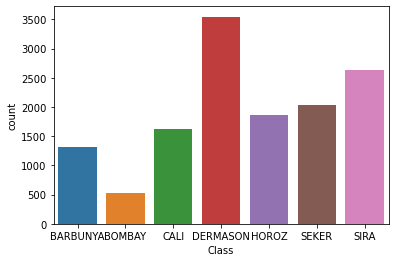

In [12]:
#plt.figure(figsize=(10,10))
sns.countplot(x="Class", data = beans)

#The samples of target variable is not distributed uniformly so resampling is required

In [13]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier 

# Import the module
from sklearn.model_selection import train_test_split

# Create X and y arrays
X = beans.drop("Class", axis=1).values

y = beans["Class"].values


# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train,y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)


# Import confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

# Generate the confusion matrix and classification report

# Import accuracy_score
from sklearn.metrics import accuracy_score

acc_test = accuracy_score(y_test, y_pred)

print('Test set accuracy of unscaled KNN Classifier: {:.3f}'.format(acc_test))

#print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

Test set accuracy of unscaled KNN Classifier: 0.797
              precision    recall  f1-score   support

    BARBUNYA       0.58      0.53      0.55       265
      BOMBAY       0.99      1.00      1.00       104
        CALI       0.76      0.78      0.77       326
    DERMASON       0.83      0.90      0.87       709
       HOROZ       0.79      0.81      0.80       372
       SEKER       0.84      0.74      0.79       406
        SIRA       0.81      0.80      0.80       527

    accuracy                           0.80      2709
   macro avg       0.80      0.79      0.80      2709
weighted avg       0.79      0.80      0.79      2709



In [14]:
#Scaling in a Pipeline

# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier 

# Import the module
from sklearn.model_selection import train_test_split

#Import Standard Scaler
from sklearn.preprocessing import StandardScaler

#Import Pipeline
from sklearn.pipeline import Pipeline

# Create X and y arrays
X = beans.drop("Class", axis=1).values

y = beans["Class"].values

#Steps in a pipeline
steps = [('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_neighbors=6))]

pipeline = Pipeline(steps)


# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1, stratify =y)


# Fit the pipeline to the training data
knn_scaled = pipeline.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = knn_scaled.predict(X_test)


#Metrics for model evaluation 

# Import classification report
from sklearn.metrics import classification_report, confusion_matrix

# Generate the confusion matrix and classification report

# Import accuracy_score
from sklearn.metrics import accuracy_score

acc_test = accuracy_score(y_test, y_pred)

print('Test set accuracy of KNN Classifier : {:.3f}'.format(acc_test))

#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Test set accuracy of KNN Classifier : 0.930
              precision    recall  f1-score   support

    BARBUNYA       0.95      0.95      0.95       265
      BOMBAY       1.00      1.00      1.00       104
        CALI       0.94      0.94      0.94       326
    DERMASON       0.90      0.95      0.92       709
       HOROZ       0.96      0.94      0.95       372
       SEKER       0.96      0.95      0.96       406
        SIRA       0.89      0.85      0.87       527

    accuracy                           0.93      2709
   macro avg       0.94      0.94      0.94      2709
weighted avg       0.93      0.93      0.93      2709



In [15]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the dataset into 80% train, 20% test
X_train, X_test, y_train, y_test= train_test_split(X, y,test_size=0.2,stratify=y,random_state=1)

# Instantiate dt, set 'criterion' to 'gini'
dt = DecisionTreeClassifier(criterion='gini',random_state=1)

# Fit dt to the training set
dt.fit(X_train,y_train)

# Predict the test set labels
y_pred = dt.predict(X_test)

# Import accuracy_score
from sklearn.metrics import accuracy_score

# Evaluate acc_test
acc_test = accuracy_score(y_test, y_pred)

print('Test set accuracy of Decission Treee Classifier: {:.3f}'.format(acc_test))

print(classification_report(y_test, y_pred))

Test set accuracy of Decission Treee Classifier: 0.902
              precision    recall  f1-score   support

    BARBUNYA       0.89      0.93      0.91       265
      BOMBAY       0.99      1.00      1.00       104
        CALI       0.91      0.90      0.91       326
    DERMASON       0.89      0.91      0.90       709
       HOROZ       0.93      0.92      0.93       372
       SEKER       0.93      0.92      0.92       406
        SIRA       0.85      0.83      0.84       527

    accuracy                           0.90      2709
   macro avg       0.91      0.92      0.92      2709
weighted avg       0.90      0.90      0.90      2709



In [16]:
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Instantiate rf
rf = RandomForestClassifier(n_estimators=100, random_state=1)
            
# Fit rf to the training set    
rf.fit(X_train, y_train) 

# Predict test set labels
y_pred = rf.predict(X_test)

# Evaluate acc_test
acc_test = accuracy_score(y_test, y_pred)

print('Test set accuracy of Random Forest Classifier: {:.3f}'.format(acc_test))

print(classification_report(y_test, y_pred))

Test set accuracy of Random Forest Classifier: 0.934
              precision    recall  f1-score   support

    BARBUNYA       0.95      0.93      0.94       265
      BOMBAY       0.99      1.00      1.00       104
        CALI       0.95      0.94      0.94       326
    DERMASON       0.91      0.95      0.93       709
       HOROZ       0.96      0.95      0.96       372
       SEKER       0.96      0.97      0.96       406
        SIRA       0.90      0.86      0.88       527

    accuracy                           0.93      2709
   macro avg       0.95      0.94      0.94      2709
weighted avg       0.93      0.93      0.93      2709

